In [1]:
import numpy as np

In [2]:
from adjustText import adjust_text

In [3]:
import verdict

In [4]:
import cc.atlas as atlas

/Users/zhafen/repos/cc/cc/publication.py:334: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (


# Load

In [5]:
a = atlas.Atlas( '../cc/tests/data/example_atlas', bibtex_fp='../cc/tests/data/example_atlas/example.bib' )

Loading bibliography entries.


100%|██████████| 10/10 [00:00<00:00, 14968.97it/s]

Storing bibliography entries.
Loading saved atlas data.


#### Process the bibtex notes.

In [6]:
a.data.process_bibtex_annotations( word_per_concept=True )
a.data.identify_unique_key_concepts()

Dict, {
'VandeVoort2018a' : None,
'Stern2018' : None,
'Howk2017' : None,
'Garrison-kimmel2017' : None,
'Hopkins2017' : None,
'Hafen2016' : None,
'Muratov2016' : None,
'VandeVoort2016' : None,
'Hafen2019' : None,
'Hafen2019a' : None,
}

In [7]:
a.data['Hafen2019'].process_abstract()

In [8]:
# Retrieve Atlas Data
for key, item in a.data.items():
    print( key )
    item.process_abstract()

VandeVoort2018a
Stern2018
Howk2017
Garrison-kimmel2017
Hopkins2017
Hafen2016
Muratov2016
VandeVoort2016
Hafen2019
Hafen2019a


In [9]:
saved_data = a.save_data()

100%|██████████| 10/10 [00:00<00:00, 19878.22it/s]

Preparing to save data.
Saving to ../cc/tests/data/example_atlas/atlas_data.h5


# Plot

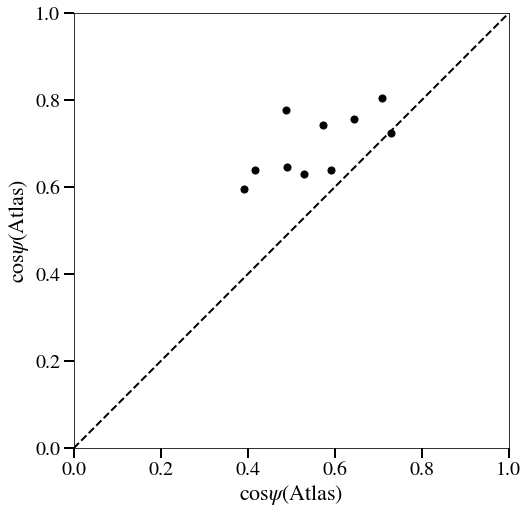

In [10]:
%matplotlib inline

figure = plt.figure( figsize=(8,8), facecolor='w' )
ax = plt.gca()

cospsi_a, cospsi_a_abs = a.plot_cospsi2d_custom(
    a,
    a,
    y_kwargs = { 'method': 'abstract similarity'},
    ax = ax,
)

ax.plot(
    [ 0, 1 ],
    [ 0, 1 ],
    linestyle = '--',
    linewidth = 2,
    color = 'k',
)

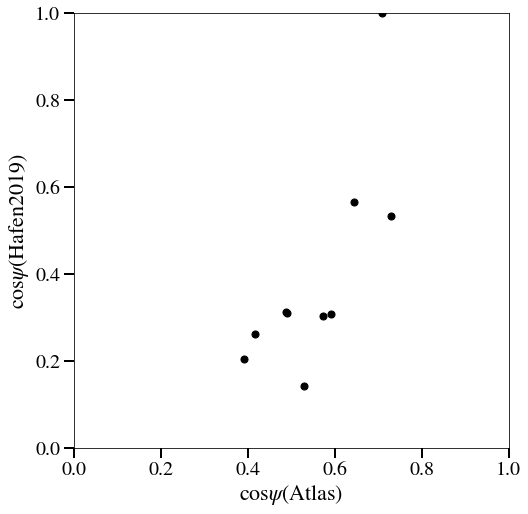

In [11]:
%matplotlib inline

cospsi_a, cospsi_h19 = a.plot_cospsi2d_custom(
    a,
    a.data['Hafen2019'],
)

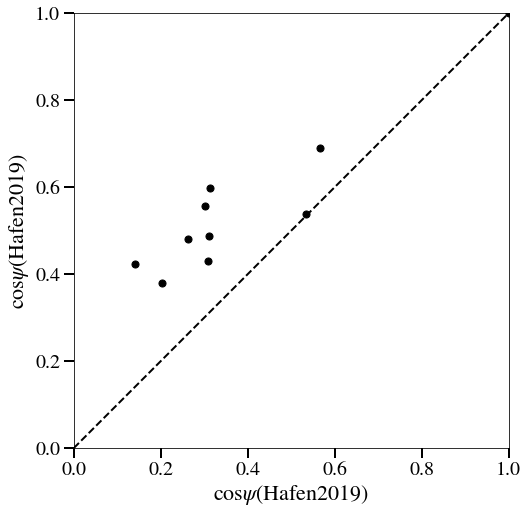

In [12]:
figure = plt.figure( figsize=(8,8), facecolor='w' )
ax = plt.gca()

cospsi_a, cospsi_h19 = a.plot_cospsi2d_custom(
    a.data['Hafen2019'],
    a.data['Hafen2019'],
    y_kwargs = { 'method': 'abstract similarity'},
    ax = ax,
)

ax.plot(
    [ 0, 1 ],
    [ 0, 1 ],
    linestyle = '--',
    linewidth = 2,
    color = 'k',
)

# Reference-Based Exploration

## Populate

#### Populate with Citing Works
Can be done iteratively.

In [13]:
# Download a bibtex file for all works that cite Hafen2019 and create a new atlas
a_H19_cit = atlas.Atlas.from_bibcodes( atlas_dir=a.atlas_dir, bibcodes=a['Hafen2019'].citations )

Loading bibliography entries.


100%|██████████| 44/44 [00:00<00:00, 101848.44it/s]

Storing bibliography entries.
Loading saved atlas data.


#### Populate with Referenced Works
Can also be done iteratively.

In [14]:
# Download a bibtex file for all works that cite Hafen2019 and create a new atlas
a_H19_ref = atlas.Atlas.from_bibcodes( atlas_dir=a.atlas_dir, bibcodes=a['Hafen2019'].references )

Loading bibliography entries.


100%|██████████| 211/211 [00:00<00:00, 287897.90it/s]

Storing bibliography entries.
Loading saved atlas data.


#### Alternatively, import to the existing atlas

In [32]:
len( list( a.data.keys() ) )

214

In [28]:
a.import_bibcodes( list(a['Hafen2019'].citations) + list(a['Hafen2019'].references) )

Loading bibliography entries.


100%|██████████| 211/211 [00:00<00:00, 263784.84it/s]

Storing bibliography entries.
Loading saved atlas data.


In [32]:
len( list( a.data.keys() ) )

214

## Process Data

In [34]:
#### Project into concept space for fast subsequent calculations
a.concept_projection(overwrite=True)

  0%|          | 0/214 [00:00<?, ?it/s]

Generating concept projection...


 28%|██▊       | 60/214 [00:30<01:18,  1.96it/s]/Users/zhafen/repos/cc/cc/publication.py:200: UserWarning: Unable to find arxiv ID or DOI for publication 2018ascl.soft10021G.

                        Not processing abstract.
  warnings.warn( failure_msg )
 28%|██▊       | 60/214 [00:30<01:19,  1.94it/s]


ValueError: need at least one array to concatenate

* Allow updating of the matrix when the set of concept basis vectors are increased

## Visualize

Plot that shows cosPsi for both referenced and cited works.

$\cos \Psi$ for
* central works
* a couple of concept vectors
* the vector that describes your upcoming publication
* a vector that predicts high citability 

## Select

## Read

### Download Full Text from ArXiv

### Open PDF/Mendeley Externally
While this might seem excessive, QoL differences like this are important.

### Open Figures in NB

### Natural Language Processing of Text to Create a Summary PDF